In [114]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import scipy.io as sio
import cv2
import json
import openslide
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
PATH_PRED_TABLE = "output_folder/HE__20211011_155001.csv"
IMG_NAME = "HE__20211011_155001"
PATH_OUTPUT = "output_folder/visualizations/"

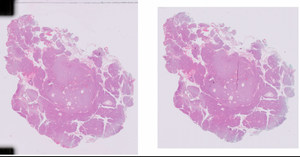

In [110]:
openslide.open_slide('wsi-folder-png/HE__20211011_155001.png').get_thumbnail((300,500))

In [125]:
df = pd.read_csv(PATH_PRED_TABLE)
df.head(3)

,tile,x,y,prediction,confidence
0,tile_0_level0_0-0-512-512.png,0,0,0,0.48321
1,tile_1_level0_0-512-512-1024.png,0,512,0,0.52496
2,tile_2_level0_0-1024-512-1536.png,0,1024,0,0.51154


In [126]:
dff = df.pivot_table(values='confidence', index=df.index, columns='prediction')
dff = dff.fillna(0.1)
dff.head(3)


prediction,0,1,2
0,0.48321,0.1,0.1
1,0.52496,0.1,0.1
2,0.51154,0.1,0.1


In [127]:
df_finale = pd.concat([df,dff], axis=1)
df_finale.head(3)

,tile,x,y,prediction,confidence,0,1,2
0,tile_0_level0_0-0-512-512.png,0,0,0,0.48321,0.48321,0.1,0.1
1,tile_1_level0_0-512-512-1024.png,0,512,0,0.52496,0.52496,0.1,0.1
2,tile_2_level0_0-1024-512-1536.png,0,1024,0,0.51154,0.51154,0.1,0.1


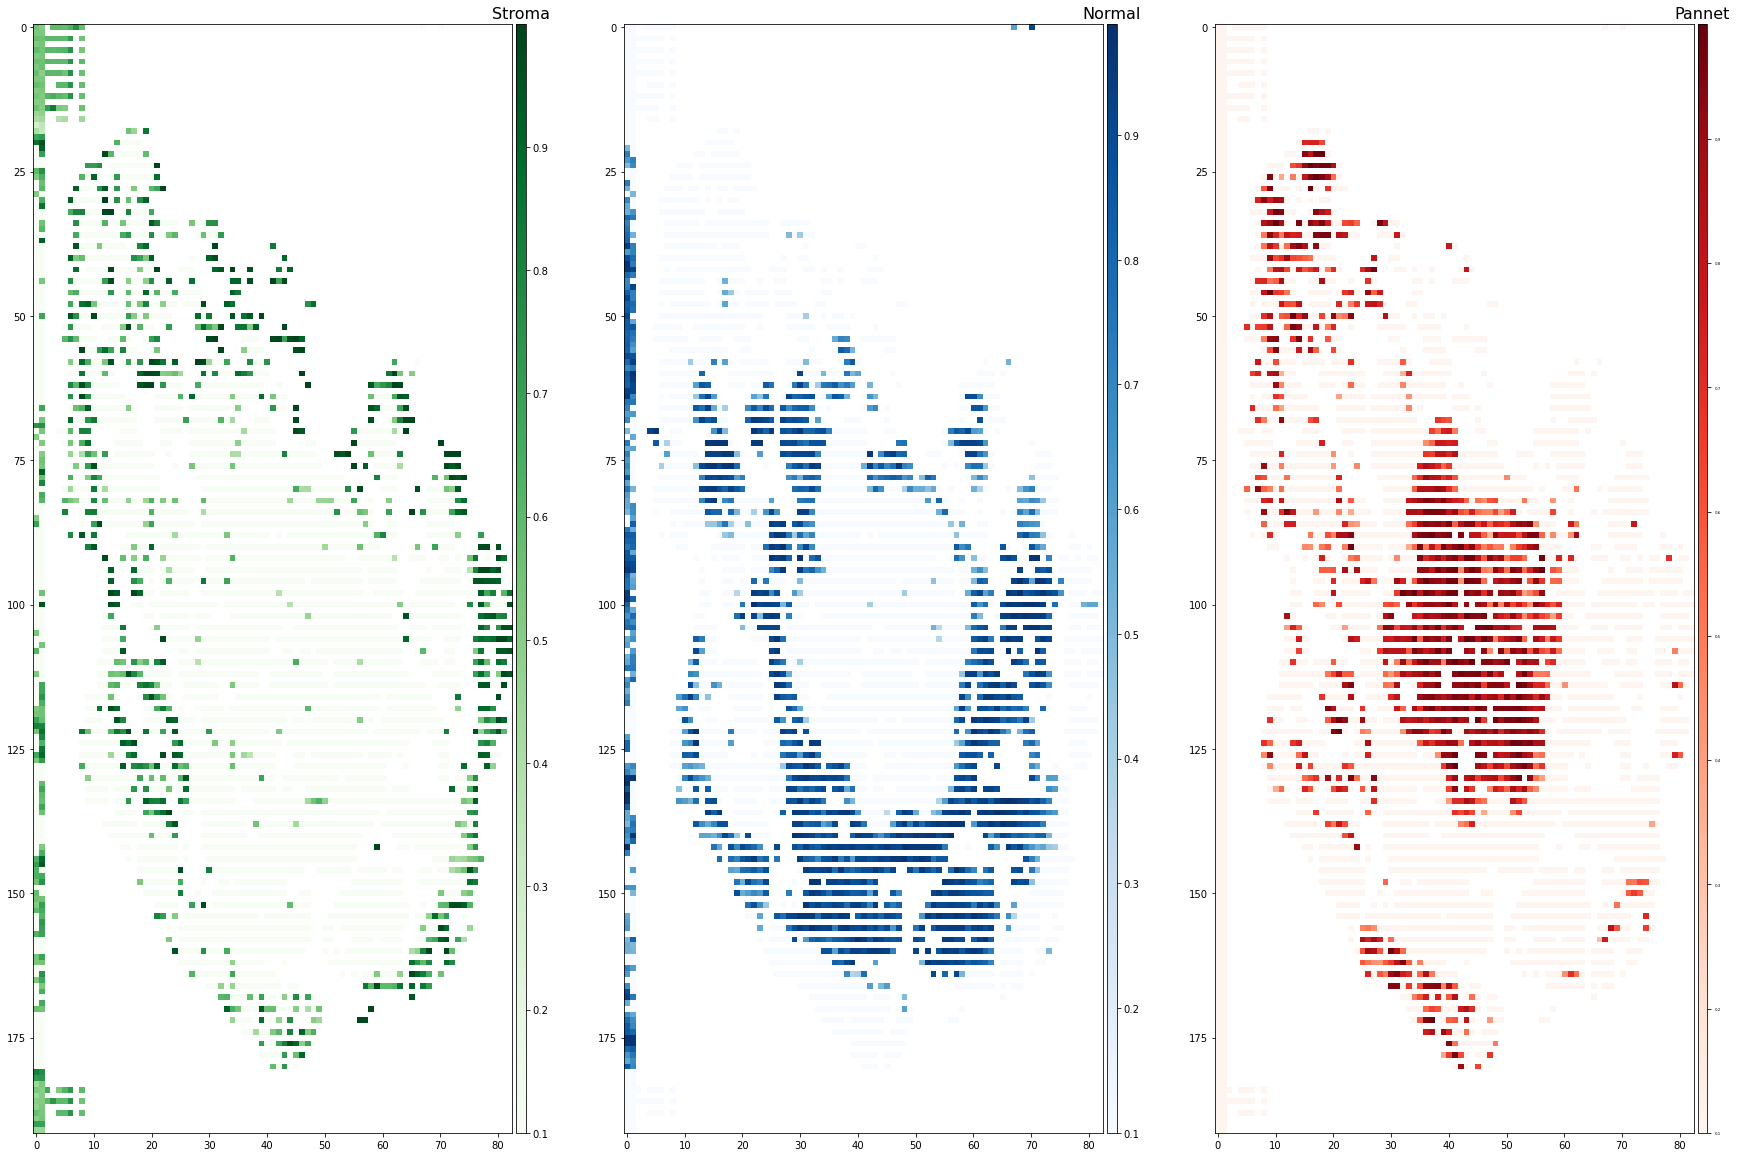

In [128]:
# Data for Each Class
df_piv_0 = pd.pivot_table(df_finale, index='y', columns='x', values=0)
df_piv_1 = pd.pivot_table(df_finale, index='y', columns='x', values=1)
df_piv_2 = pd.pivot_table(df_finale, index='y', columns='x', values=2)

# Plots
fig=plt.figure(figsize=(30,90))

ax = plt.subplot(1,3,1)
plt.imshow(df_piv_0, cmap ="Greens")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(cax=cax)
plt.title("Stroma",fontsize=16)

ax = plt.subplot(1,3,2)
plt.imshow(df_piv_1, cmap ="Blues")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(cax=cax)
plt.title("Normal",fontsize=16)

ax = plt.subplot(1,3,3)
plt.imshow(df_piv_2, cmap ="Reds")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(cax=cax)
plt.title("Pannet",fontsize=16)

plt.xticks(fontsize=4)
plt.yticks(fontsize=4)

plt.savefig(os.path.join(PATH_OUTPUT, IMG_NAME + '_class_heatmap.png'), dpi=fig.dpi, bbox_inches='tight', transparent=True)
plt.show()